In [1]:
from pathlib import Path
import xarray as xr
import re
import numpy as np
from xhistogram.xarray import histogram as xhist
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'xhistogram'

In [2]:
#Paths (may need to be changed)
INALT_2009_T = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_T_iMirabilis.nc')
INALT_2009_U = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_U_iMirabilis.nc')
INALT_2009_V = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_V_iMirabilis.nc')
INALT_2009_W = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_W_iMirabilis.nc')
ROMS = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/ROMS/roms_avg01_2009.nc')

In [30]:
temp_surface=INALT_2009_T['votemper'].isel(deptht=0)
salt_surface=INALT_2009_T['vosaline'].isel(deptht=0)

In [18]:
u_surface=INALT_2009_U['vozocrtx'].isel(depthu=0)
v_surface=INALT_2009_U['vozocrtx'].isel(depthu=0)

u_ewing=INALT_2009_U['vozocrtx'].isel(depthu=10)
v_ewing=INALT_2009_U['vozocrtx'].isel(depthu=10)

In [35]:
speed_surface= (u_surface**2 + v_surface**2) ** 0.5

In [19]:
speed_ewing= (u_ewing**2 + v_ewing**2) ** 0.5

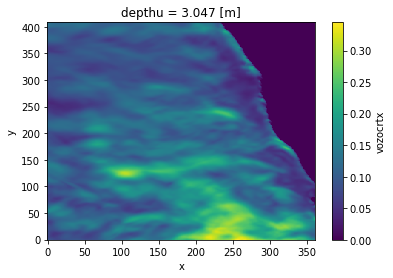

In [43]:
(np.mean(speed_surface,axis=0)).plot()

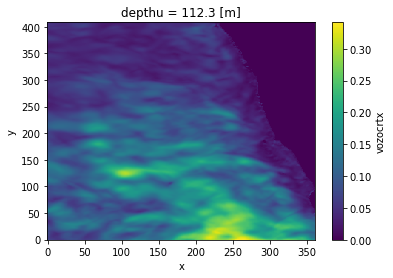

In [31]:
(np.mean(speed_ewing,axis=0)).plot()

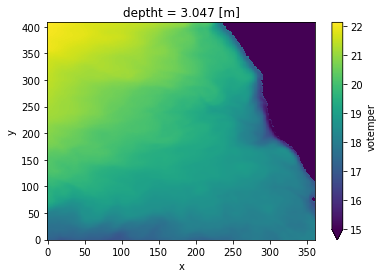

In [72]:
(np.mean(temp_surface,axis=0)).plot(vmin=15)

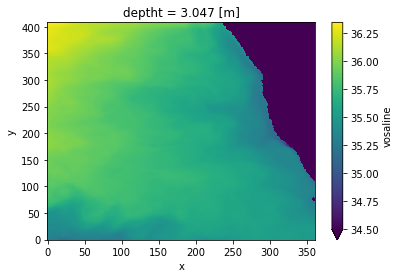

In [70]:
(np.mean(salt_surface,axis=0)).plot(vmin=34.5)

AttributeError: 'str' object has no attribute 'ndim'

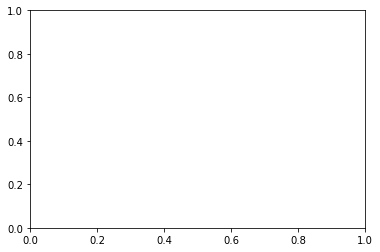

In [48]:
plt.streamplot(x='nav_lon',y='nav_lon',u=np.mean(u_surface,axis=0),v=np.mean(v_surface,axis=0))

In [45]:
u_surface

<xarray.DataArray 'vozocrtx' (time_counter: 365, y: 409, x: 362)>
array([[[ 0.145327,  0.126833, ...,  0.171843,  0.169448],
        [ 0.143196,  0.12546 , ...,  0.155326,  0.156184],
        ...,
        [-0.087813, -0.088225, ...,  0.      ,  0.      ],
        [-0.089676, -0.090403, ...,  0.      ,  0.      ]],

       [[ 0.151111,  0.1336  , ...,  0.214781,  0.214165],
        [ 0.150456,  0.133674, ...,  0.189557,  0.191184],
        ...,
        [-0.048642, -0.048044, ...,  0.      ,  0.      ],
        [-0.047885, -0.047468, ...,  0.      ,  0.      ]],

       ...,

       [[-0.037134, -0.035125, ...,  0.227934,  0.210395],
        [-0.04443 , -0.043823, ...,  0.21919 ,  0.207967],
        ...,
        [-0.036834, -0.03986 , ...,  0.      ,  0.      ],
        [-0.039305, -0.042966, ...,  0.      ,  0.      ]],

       [[ 0.004335,  0.005589, ...,  0.247449,  0.21873 ],
        [-0.005251, -0.005374, ...,  0.222453,  0.199076],
        ...,
        [-0.047975, -0.052212, ...,  0.      ,  0.      ],
        [-0.052824, -0.057624, ...,  0.      ,  0.      ]]], dtype=float32)
Coordinates:
    depthu         float32 3.047
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  (time_counter) datetime64[ns] 2009-01-01T12:00:00 ... 2009...
  * time_counter   (time_counter) datetime64[ns] 2009-01-01T12:00:00 ... 2009...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           Sea Water X Velocity
    units:               m/s
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s)